In [2]:
#Importing Library
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst']

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

C:\Users\bagus\AppData\Local\Temp\ipykernel_15120\2587486785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month


In [5]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

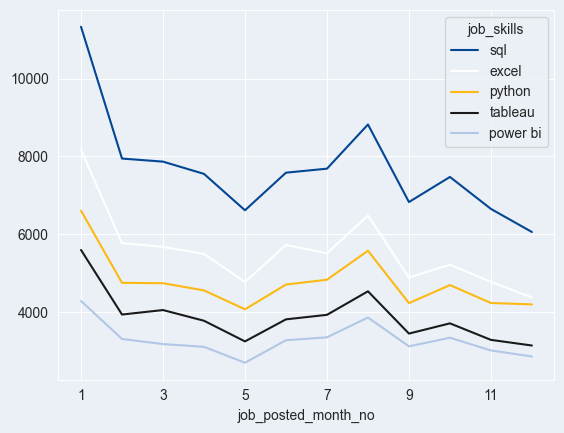

In [6]:
df_DA_pivot.iloc[:, 0:5].plot(kind='line')

In [7]:
df_DA_pivot = df_DA_pivot.reset_index()

In [8]:
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

In [9]:
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')

In [10]:
df_DA_pivot

job_skills,job_posted_month_no,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,1,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,2,0,0,1,0,0,0,1,0,0
February,2,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,0
March,3,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,0,1,0,0,0,0,1,0,0,0
April,4,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,0,1,0,0,0,0,0
May,5,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,0,1
June,6,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,0
July,7,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,0,1,0,0,0,0,0,0,0
August,8,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,0
September,9,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

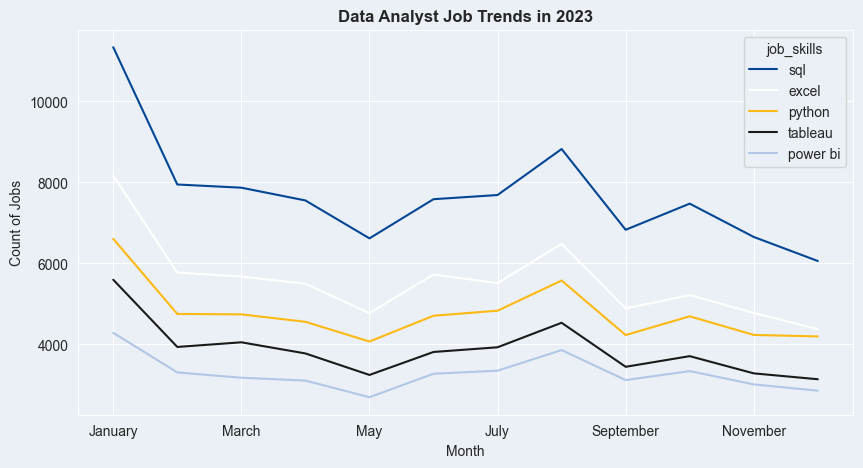

In [12]:
df_DA_pivot.iloc[:, 0:5].plot(kind='line', figsize=(10, 5))

plt.title('Data Analyst Job Trends in 2023', fontsize='12', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Count of Jobs')

plt.show()

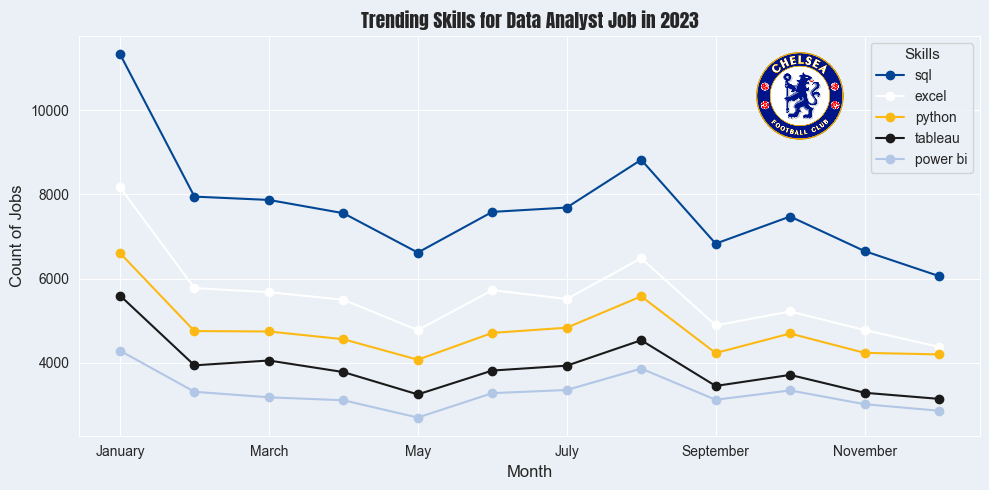

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import font_manager as fm

#Set Font
font_path = 'C:/Users/bagus/Downloads/Anton/Anton-Regular.ttf'  # ganti dengan path ke file font kamu
cinzel_font = fm.FontProperties(fname=font_path)

# Set seaborn style dan color palette
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette(["#034694", "#FFFFFF", "#FDB913", "#1A1A1A", "#B2C6E6"]))  # Royal blue theme
plt.rcParams['axes.facecolor'] = '#EAF0F6'
plt.rcParams['figure.facecolor'] = '#EAF0F6'

# Plot data
ax = df_DA_pivot.iloc[:, 0:5].plot(kind='line', figsize=(10, 5), marker='o')

# Tambahkan judul dan label dengan styling
ax.set_title('Trending Skills for Data Analyst Job in 2023', fontproperties=cinzel_font, fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Count of Jobs', fontsize=12)
ax.legend(title='Skills', title_fontsize=11, fontsize=10, loc='upper right', frameon=True)

# === Tambahkan Logo ===
logo = mpimg.imread('C:/Users/bagus/Downloads/Chelsea_FC.png')  # Pastikan file logo berada di path yang benar
imagebox = OffsetImage(logo, zoom=0.2)  # Ubah zoom sesuai ukuran
ab = AnnotationBbox(imagebox, (0.80, 0.85), frameon=False, xycoords='axes fraction')
ax.add_artist(ab)

plt.tight_layout()
plt.show()